# Water Classification with CNN

Water Classification project with CNN aims to develop a model that can classify water samples into safe or unsafe categories based on their quality parameters. Convolutional Neural Networks (CNNs) are utilized for their ability to effectively learn and extract features from image-like data, making them well-suited for image classification tasks.

1 for Safe

0 for Unsafe

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Importing Dataset

In [2]:
dataframe = pd.read_csv('waterQuality1.csv')

# Data Processing

Data processing is a crucial step in any machine learning project, including the Safe Water Classification project. It involves preparing the raw data for training a model by transforming, cleaning, and organizing it in a format suitable for analysis and model training.

In [3]:
dataframe.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
dataframe.tail()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7994,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7998,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [5]:
dataframe.shape

(7999, 21)

In [6]:
dataframe.head().T

,0,1,2,3,4
aluminium,1.65,2.32,1.01,1.36,0.92
ammonia,9.08,21.16,14.02,11.33,24.33
arsenic,0.04,0.01,0.04,0.04,0.03
barium,2.85,3.31,0.58,2.96,0.2
cadmium,0.007,0.002,0.008,0.001,0.006
chloramine,0.35,5.28,4.24,7.23,2.67
chromium,0.83,0.68,0.53,0.03,0.69
copper,0.17,0.66,0.02,1.66,0.57
flouride,0.05,0.9,0.99,1.08,0.61
bacteria,0.2,0.65,0.05,0.71,0.13


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [9]:
dataframe.select_dtypes('object').columns

Index(['ammonia', 'is_safe'], dtype='object')

In [11]:
dataframe.select_dtypes(['int64', 'float64']).columns

Index(['aluminium', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium',
       'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates',
       'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver',
       'uranium'],
      dtype='object')

In [12]:
dataframe.drop([7551,7568,7890],axis=0,inplace=True)

In [13]:
dataframe.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [14]:
dataframe.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [15]:
dataframe['ammonia'] = dataframe['ammonia'].astype('float64')
dataframe['is_safe'] = dataframe['is_safe'].astype('int64')

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [17]:
dataframe.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [18]:
dataframe.isna().sum().any()

False

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [19]:
dataframe.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [20]:
corr_matrix = dataframe.corr()

In [21]:
corr_matrix

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,...,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,...,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,...,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,...,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,...,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,...,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,...,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,...,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,...,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


<AxesSubplot:>

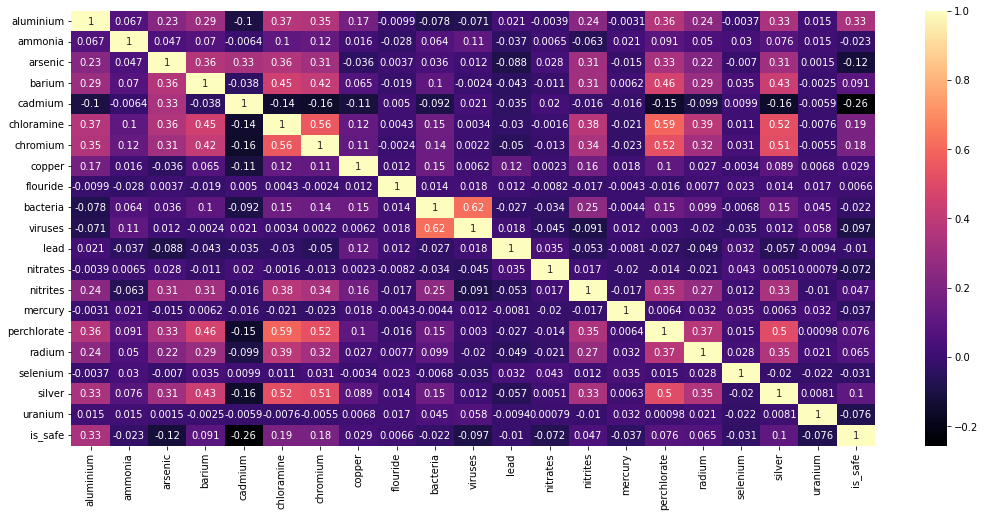

In [22]:
plt.figure(figsize = (18, 8))
sns.heatmap(
    corr_matrix, 
    annot = True, 
    cmap = 'magma'
)

In [23]:
dataset = dataframe.drop('is_safe', axis = 1)

<AxesSubplot:title={'center':'Correlation With Safe'}>

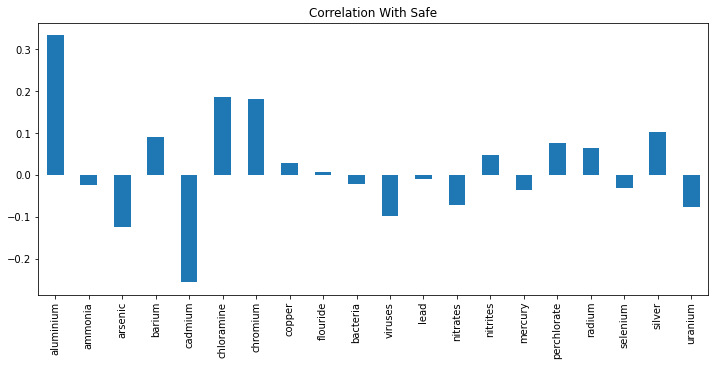

In [24]:
dataset.corrwith(dataframe['is_safe']).plot.bar(
    figsize = (12, 5),
    title = 'Correlation With Safe',
    rot = 90
)

In [25]:
dataframe.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [26]:
dataframe.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# Splitting Data

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [27]:
x = dataframe.drop('is_safe', axis = 1)
y = dataframe['is_safe']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6396, 20), (1600, 20), (6396,), (1600,))

# Scaling

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

StandardScaler follows the concept of standardization, also known as Z-score normalization. It transforms the features such that they have a mean of 0 and a standard deviation of 1. This process centers the feature distribution around 0 and scales it to a standard deviation of 1.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
x_train

array([[-0.46001722,  1.00069649, -0.28079184, ...,  1.39962141,
        -0.61048898, -0.17962468],
       [-0.51543167,  1.02094028, -0.47840986, ..., -1.03109425,
         0.57518018,  0.56158788],
       [ 2.98359541,  0.93546652,  3.07871445, ..., -1.03109425,
        -0.88946997,  0.56158788],
       ...,
       [ 1.18658376,  0.0526126 , -0.59698067, ...,  0.70513122,
         0.2961992 ,  0.93219416],
       [-0.48376627, -0.70540466, -0.47840986, ..., -0.33660406,
        -0.61048898,  0.93219416],
       [-0.46001722, -0.44785873, -0.51793347, ..., -0.33660406,
        -0.88946997,  0.93219416]])

In [35]:
x_test

array([[-0.51543167, -1.58938324, -0.28079184, ...,  0.70513122,
        -0.81972472, -1.6620498 ],
       [-0.30960655,  1.40219821, -0.47840986, ..., -0.68384916,
         0.2961992 ,  0.1909816 ],
       [-0.50751532,  0.32252972,  0.39110942, ..., -0.33660406,
        -0.68023423, -0.92083724],
       ...,
       [-0.45210087, -1.57926134, -0.43888626, ...,  0.35788613,
        -0.61048898,  0.1909816 ],
       [-0.48376627, -0.28703312, -0.32031545, ..., -1.37833935,
        -0.81972472,  0.93219416],
       [ 1.85947359,  1.03893475,  2.76252563, ..., -0.68384916,
         1.0633969 ,  0.1909816 ]])

In [36]:
x_train.shape, x_test.shape

((6396, 20), (1600, 20))

In [37]:
x_train = x_train.reshape(6396, 20, 1)
x_test = x_test.reshape(1600, 20, 1)

In [38]:
x_train.shape, x_test.shape

((6396, 20, 1), (1600, 20, 1))

# Building CNN Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling1D, Conv1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
model = Sequential()
model.add(Conv1D(32, kernel_size = 3, activation = 'relu', input_shape = (20, 1)))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())

model.add(Conv1D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 18, 32)            128       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 conv1d_4 (Conv1D)           (None, 7, 64)             6208      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                      

In [50]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 3,
                           restore_best_weights = True)

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [51]:
model.compile(optimizer = Adam(0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance.

In [52]:
model.fit(x_train, y_train, 
          validation_data = (x_test, y_test), 
          epochs = 250, 
          callbacks = [early_stop])

Epoch 1/250
200/200 [==============================] - 27s 52ms/step - loss: 0.6001 - accuracy: 0.6981 - val_loss: 0.4048 - val_accuracy: 0.8756
Epoch 2/250
200/200 [==============================] - 8s 42ms/step - loss: 0.3701 - accuracy: 0.8433 - val_loss: 0.3131 - val_accuracy: 0.8794
Epoch 3/250
200/200 [==============================] - 7s 33ms/step - loss: 0.3193 - accuracy: 0.8770 - val_loss: 0.2850 - val_accuracy: 0.8888
Epoch 4/250
200/200 [==============================] - 7s 34ms/step - loss: 0.2982 - accuracy: 0.8859 - val_loss: 0.2709 - val_accuracy: 0.8956
Epoch 5/250
200/200 [==============================] - 9s 43ms/step - loss: 0.2773 - accuracy: 0.8949 - val_loss: 0.2598 - val_accuracy: 0.8981
Epoch 6/250
200/200 [==============================] - 7s 35ms/step - loss: 0.2633 - accuracy: 0.8999 - val_loss: 0.2529 - val_accuracy: 0.8975
Epoch 7/250
200/200 [==============================] - 9s 44ms/step - loss: 0.2501 - accuracy: 0.9059 - val_loss: 0.2480 - val_accuracy

In [53]:
model.save('model_pure_water_classifier.h5')

# Learning Curve

The learning curve is a plot that shows how the loss and accuracy of a model change during training. It provides insights into how well the model is learning from the training data and how it generalizes to unseen data. The learning curve typically shows the training and validation loss/accuracy on the y-axis and the number of epochs on the x-axis. By analyzing the learning curve, you can identify if the model is overfitting (high training loss, low validation loss) or underfitting (high training and validation loss). It is a useful tool for monitoring and evaluating the performance of machine learning models.

In [54]:
losses = pd.DataFrame(model.history.history)

In [56]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.600057,0.698093,0.404840,0.875625
1,0.370064,0.843340,0.313077,0.879375
2,0.319264,0.876954,0.284994,0.888750
3,0.298172,0.885866,0.270897,0.895625
4,0.277273,0.894934,0.259765,0.898125


<AxesSubplot:>

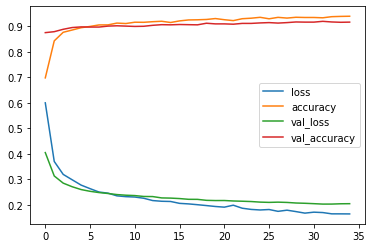

In [57]:
losses.plot()

<AxesSubplot:>

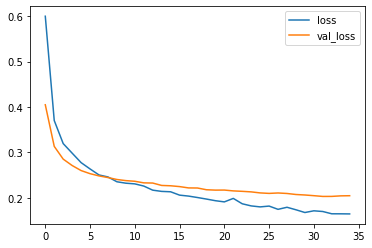

In [58]:
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

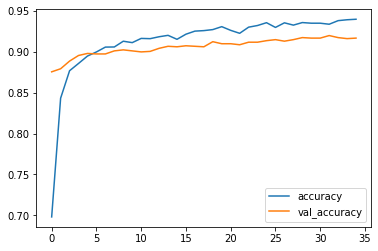

In [59]:
losses[['accuracy', 'val_accuracy']].plot()

# Prediction 

In [60]:
y_pred = model.predict(x_test)
predict_class = y_pred.argmax(axis = 1)

50/50 [==============================] - 1s 5ms/step


In [62]:
print(y_test.iloc[20]), print(y_pred[20])

0
[0.00898908]


(None, None)

In [66]:
print(y_test.iloc[44]), print(y_pred[44])

0
[0.17754799]


(None, None)

# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during prediction or classification tasks and gaining insights into the types of mistakes it is making. Error analysis can provide valuable information for model refinement and identifying areas for improvement

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

The accuracy score is calculated using the following formula:

Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

In [68]:
accuracy_score = accuracy_score(y_test, predict_class)

In [69]:
accuracy_score

0.875

A classification report is a summary of various evaluation metrics for a classification model. It provides a comprehensive overview of the model's performance, including metrics such as precision, recall, F1 score, and support.

In [71]:
classification_report = classification_report(y_test, predict_class)

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1400
           1       0.00      0.00      0.00       200

    accuracy                           0.88      1600
   macro avg       0.44      0.50      0.47      1600
weighted avg       0.77      0.88      0.82      1600



A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It is a useful tool for evaluating the accuracy and effectiveness of a classification model.

In [75]:
confusion_matrix = confusion_matrix(y_test, predict_class)

In [76]:
confusion_matrix

array([[1400,    0],
       [ 200,    0]], dtype=int64)

<AxesSubplot:>

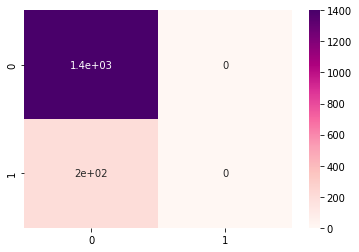

In [82]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'RdPu')